In [1]:
import f3dasm
import numpy as np
import copy
import pandas as pd

2022-11-16 16:07:50.864968: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-16 16:07:50.941271: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
seed = 2021
dim = 10
iterations = 1000
bounds = np.tile([-1.0,1.0], (dim, 1))
design = f3dasm.make_nd_continuous_design(bounds=bounds, dimensionality=dim)

function = f3dasm.functions.Sphere(dimensionality=dim, scale_bounds=bounds, seed=seed)

data = f3dasm.Data(design=design)
optimizer = f3dasm.optimization.CMAES(data=data, seed=seed)
sampler = f3dasm.sampling.LatinHypercube(design=design, seed=seed)

In [3]:
samples = sampler.get_samples(30)
samples.add_output(output=function(samples))
samples

Data(design=DesignSpace(input_space=[ContinuousParameter(name='x0', _type='float', lower_bound=-1.0, upper_bound=1.0), ContinuousParameter(name='x1', _type='float', lower_bound=-1.0, upper_bound=1.0), ContinuousParameter(name='x2', _type='float', lower_bound=-1.0, upper_bound=1.0), ContinuousParameter(name='x3', _type='float', lower_bound=-1.0, upper_bound=1.0), ContinuousParameter(name='x4', _type='float', lower_bound=-1.0, upper_bound=1.0), ContinuousParameter(name='x5', _type='float', lower_bound=-1.0, upper_bound=1.0), ContinuousParameter(name='x6', _type='float', lower_bound=-1.0, upper_bound=1.0), ContinuousParameter(name='x7', _type='float', lower_bound=-1.0, upper_bound=1.0), ContinuousParameter(name='x8', _type='float', lower_bound=-1.0, upper_bound=1.0), ContinuousParameter(name='x9', _type='float', lower_bound=-1.0, upper_bound=1.0)], output_space=[ContinuousParameter(name='y', _type='float', lower_bound=-inf, upper_bound=inf)]), data=       input                            

In [4]:
optimizer.set_data(copy.copy(samples))
optimizer.iterate(iterations=iterations, function=function)

Optimizing for 1000 iterations with CMAES


In [5]:
optimizer.data

Data(design=DesignSpace(input_space=[ContinuousParameter(name='x0', _type='float', lower_bound=-1.0, upper_bound=1.0), ContinuousParameter(name='x1', _type='float', lower_bound=-1.0, upper_bound=1.0), ContinuousParameter(name='x2', _type='float', lower_bound=-1.0, upper_bound=1.0), ContinuousParameter(name='x3', _type='float', lower_bound=-1.0, upper_bound=1.0), ContinuousParameter(name='x4', _type='float', lower_bound=-1.0, upper_bound=1.0), ContinuousParameter(name='x5', _type='float', lower_bound=-1.0, upper_bound=1.0), ContinuousParameter(name='x6', _type='float', lower_bound=-1.0, upper_bound=1.0), ContinuousParameter(name='x7', _type='float', lower_bound=-1.0, upper_bound=1.0), ContinuousParameter(name='x8', _type='float', lower_bound=-1.0, upper_bound=1.0), ContinuousParameter(name='x9', _type='float', lower_bound=-1.0, upper_bound=1.0)], output_space=[ContinuousParameter(name='y', _type='float', lower_bound=-inf, upper_bound=inf)]), data=         input                          

In [6]:
from f3dasm.base.metaoptimizer import MetaOptimizer, EqualParts_Strategy

In [7]:
optimizer_1 = f3dasm.optimization.RandomSearch(data=samples, seed=seed)
optimizer_2 = f3dasm.optimization.CMAES(data=samples, seed=seed)
optimizer_3 = f3dasm.optimization.Adam(data=samples, seed=seed)


strategy= EqualParts_Strategy(optimizers=[optimizer_1, optimizer_2, optimizer_3])


metaoptimizer = MetaOptimizer(data=samples, strategy=strategy)

In [8]:
metaoptimizer.iterate(iterations=iterations, function=function)

Optimizing for 333 iterations with RandomSearch
Optimizing for 333 iterations with CMAES


2022-11-16 16:07:56.050557: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Optimizing for 334 iterations with Adam


(<Figure size 700x700 with 1 Axes>,
 <AxesSubplot: xlabel='$X_{0}$', ylabel='$X_{1}$'>)

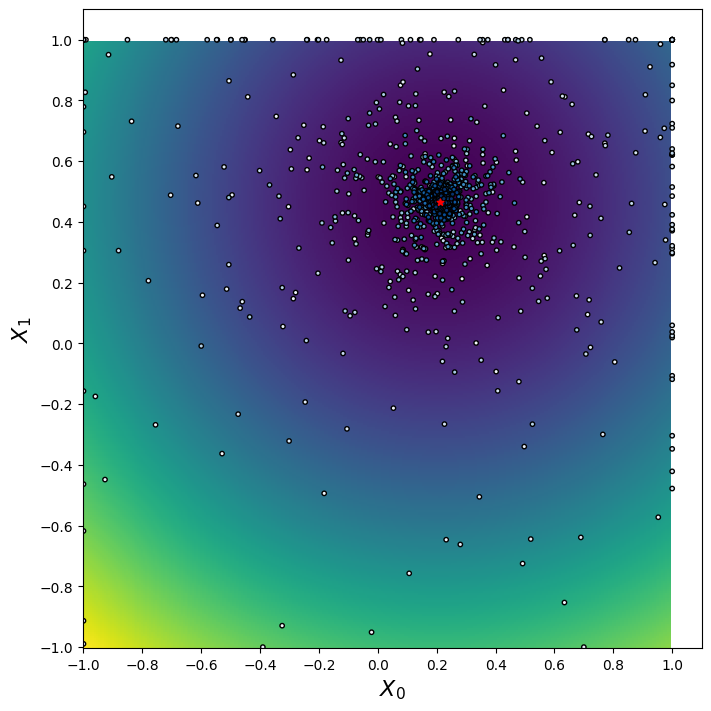

In [9]:
function.plot_data(data=optimizer.extract_data(), domain=bounds)

(<Figure size 700x700 with 1 Axes>,
 <AxesSubplot: xlabel='$X_{0}$', ylabel='$X_{1}$'>)

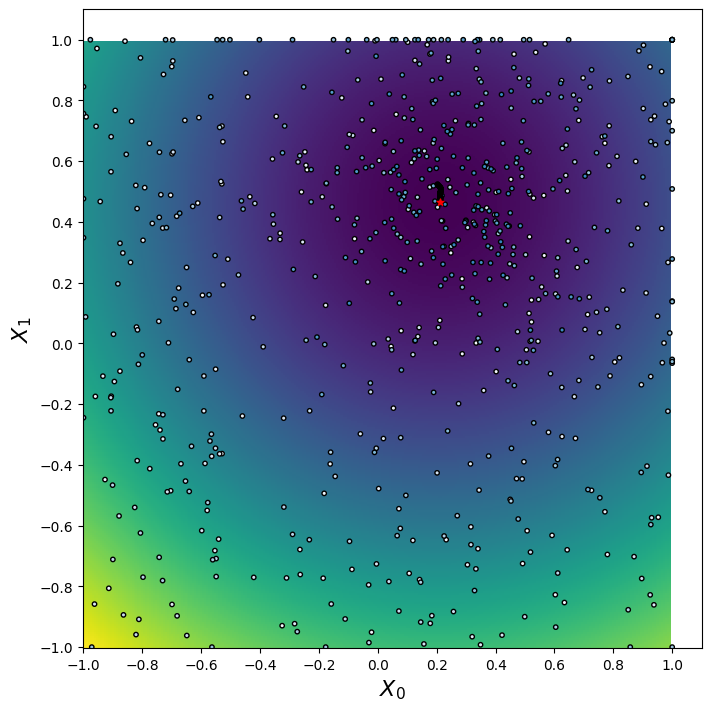

In [10]:
function.plot_data(data=metaoptimizer.extract_data(),domain=bounds)

In [11]:
# pd.set_option('display.max_rows', None)
# metaoptimizer.data.data

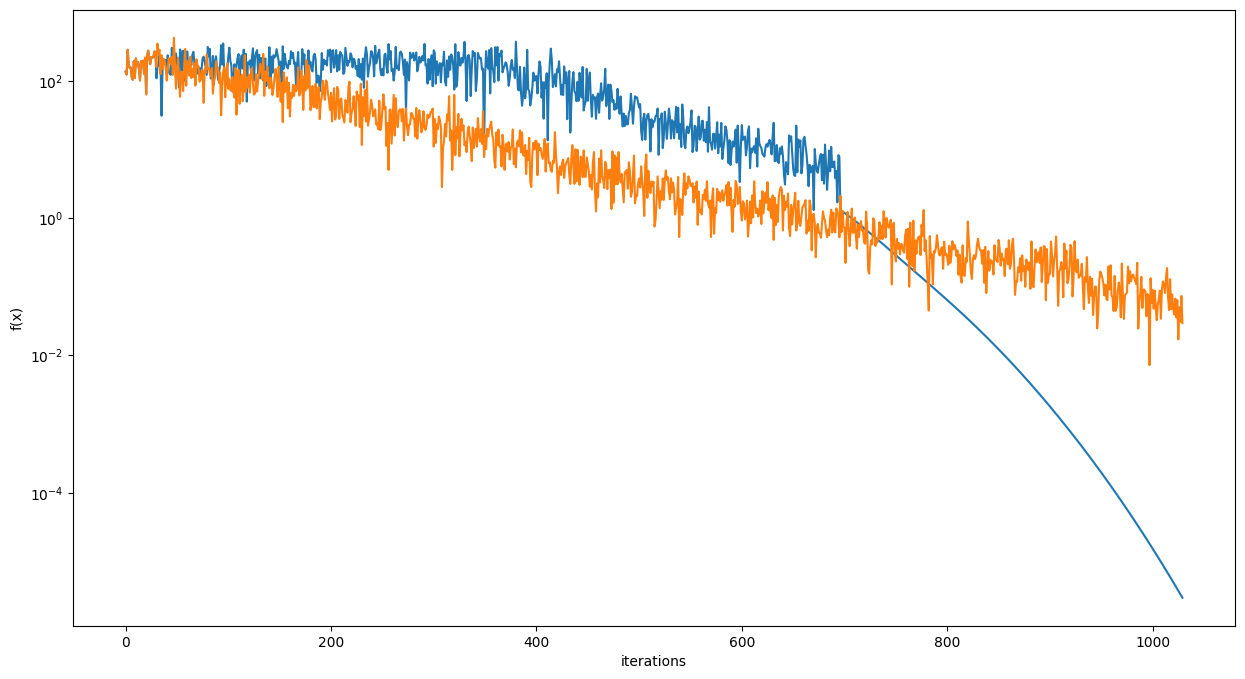

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.figure(figsize=(15,8)), plt.axes()

ax.set_xlabel('iterations')
ax.set_ylabel('f(x)')
ax.set_yscale('log')
ax.plot(metaoptimizer.data.get_output_data())
ax.plot(optimizer.data.get_output_data())